# *Amazon's Top Books of the Last 10 Years: Bestsellers from 2009-2019*


# **About the dataset:**

*This dataset contains information about top selling books of Amazon(550 books) either belonging to fiction or non-fiction.*

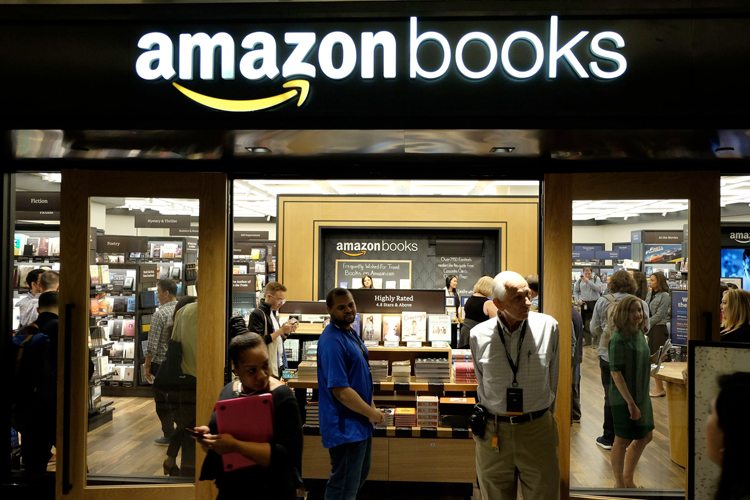

# **Workprocess**

* Step 1:Importing Libraries
* Step 2: Loading the Dataset
* Step 3 : Data Preparation and Cleaning
* Step 4 : Data insights
* Step 5 : Conclusion
    

# **Step 1 : Importing Libraries**

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud
from matplotlib import colors 
import plotly.graph_objs as go

# **Step 2: Loading the Dataset**

*To start off, we can download the data and generate a list of files contained within the dataset.*

In [31]:
url = "C:\\Users\\Ayush\\Downloads\\bestsellers with categories.csv"

In [32]:
df=pd.read_csv(url)
df

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


In [33]:
pd.set_option("display.max_columns",500)

* *Checking shape*

In [34]:
df.shape

(550, 7)

**Row and Columns**

* Rows : 550
* Columns : 7

* *Preview of Data*

In [35]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


* *Fetching column names*

In [36]:
df.columns

Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')

* *Basic understanding of Data*

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [38]:
df.dtypes

Name            object
Author          object
User Rating    float64
Reviews          int64
Price            int64
Year             int64
Genre           object
dtype: object

In [39]:
df.nunique()

Name           351
Author         248
User Rating     14
Reviews        346
Price           40
Year            11
Genre            2
dtype: int64

* *To get an overview of the dataframe*

In [40]:
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


* *Based on the table provided, we can see that the highest price listed for a book is $105, and the highest rating given to a book is 4.9.*

**Showing Co-relation within the data b/w the columns using corr() function**

<AxesSubplot:>

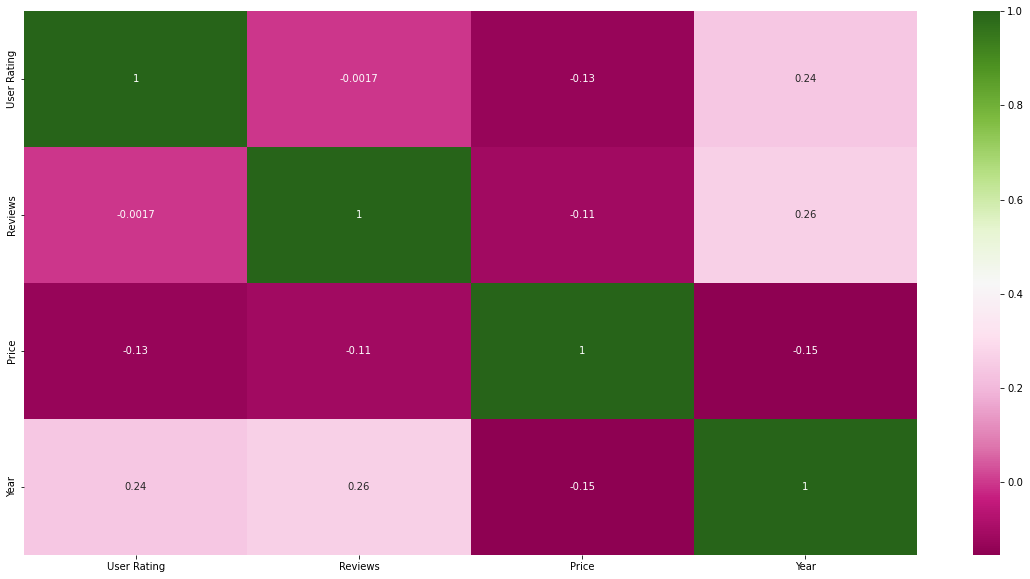

In [41]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),cmap='PiYG',annot=True)

# **Step 3 : Data Preparation and Cleaning**

* **Checking for null values**

In [42]:
df.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

In [43]:
name= df.isnull().sum().rename('num_of_missing').reset_index()
name.columns = ['feature', 'num_of_missing']
name['percentage_of_missings'] = name['num_of_missing'].apply(lambda x:x/len(df))
name.sort_values(by='percentage_of_missings',ascending=False)

,feature,num_of_missing,percentage_of_missings
0,Name,0,0.0
1,Author,0,0.0
2,User Rating,0,0.0
3,Reviews,0,0.0
4,Price,0,0.0
5,Year,0,0.0
6,Genre,0,0.0


In [44]:
df.rename(columns={"User Rating":"User_Rating"},inplace=True)

In [45]:
df.head()

,Name,Author,User_Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [46]:
for i in df.columns:
    print(i,"---------",df[i].nunique())

Name --------- 351
Author --------- 248
User_Rating --------- 14
Reviews --------- 346
Price --------- 40
Year --------- 11
Genre --------- 2


# **Step 4 : Data insights**

**Pairplot to show various relations based on genre**

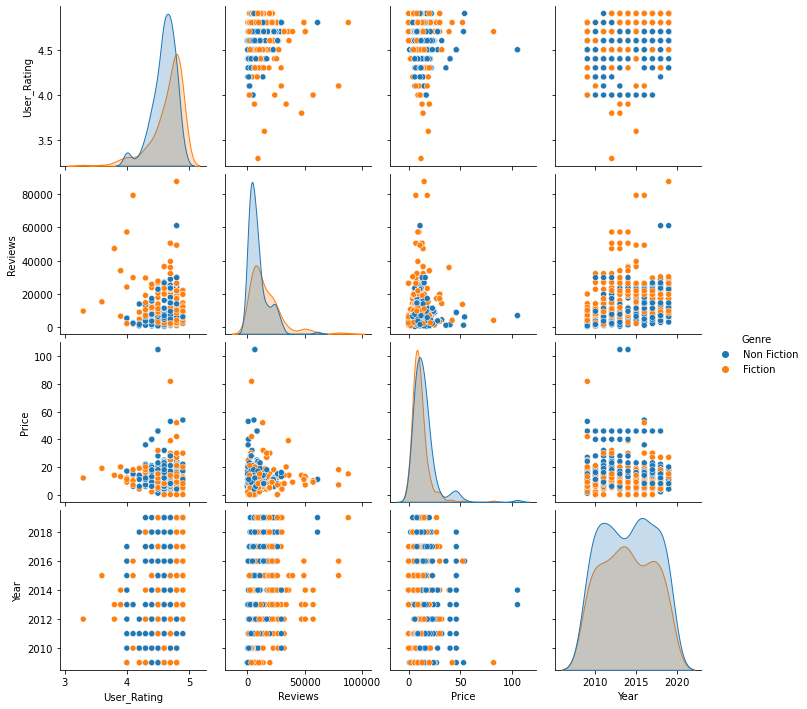

In [47]:
sns.pairplot(df,hue='Genre')

**Barplot to find the frequency of the Genres**

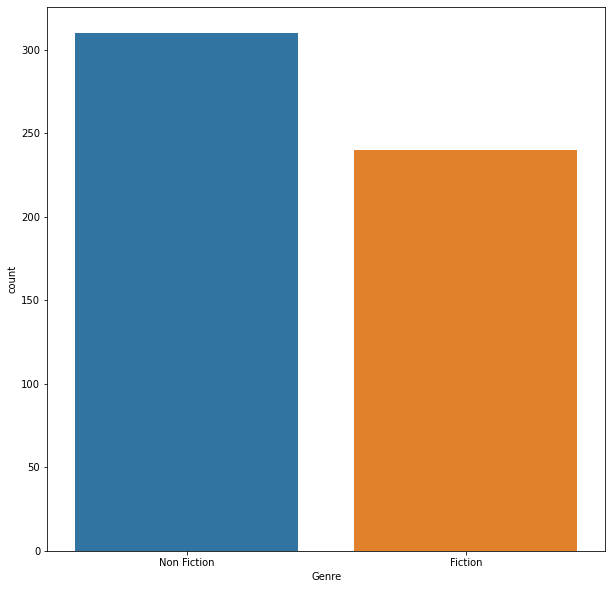

In [48]:
sns.countplot(
    data=df, x =df['Genre']

)
plt.show()

In [49]:
x1=df[df['Genre']=='Non Fiction']
x2=x1.sort_values(by='User_Rating',ascending=False)[0:550]
figure = go.Figure(data=[go.Table(header=dict(values=['Author', 'User_Rating'],fill_color='green'),
                               cells=dict(values=[x2['Author'],x2['User_Rating']],fill_color='white'))])
figure.show()

In [50]:
x1=df[df['Genre']=='Fiction']
x2=x1.sort_values(by='User_Rating',ascending=False)[0:550]

figure = go.Figure(data=[go.Table(header=dict(values=['Author', 'User_Rating'],fill_color='green'),
                 cells=dict(values=[x1['Author'],x1['User_Rating']],fill_color='white'))

            ])

figure.show()


**Which author has the most books?**

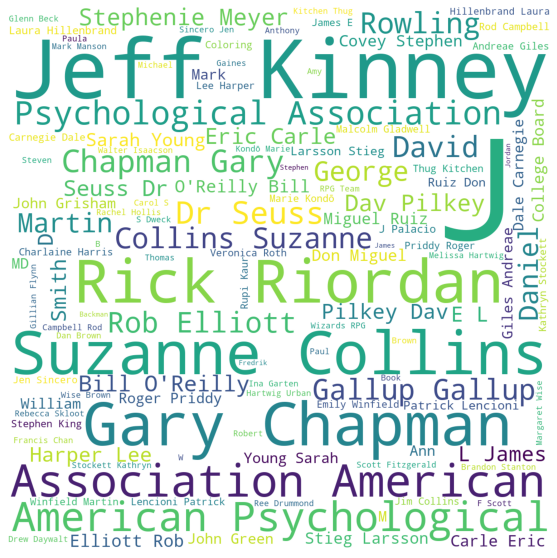

In [51]:
plt.rcParams['figure.figsize'] = (10,10)
wordcloud =  WordCloud(background_color= 'white',
                       width = 1200,height = 1200 ,
                       max_words = 120).generate(" ".join(df['Author']))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

**Which authors have the most books between 2009-2019?**

In [52]:
df.Author.value_counts()

Jeff Kinney                           12
Gary Chapman                          11
Rick Riordan                          11
Suzanne Collins                       11
American Psychological Association    10
                                      ..
Keith Richards                         1
Chris Cleave                           1
Alice Schertle                         1
Celeste Ng                             1
Adam Gasiewski                         1
Name: Author, Length: 248, dtype: int64

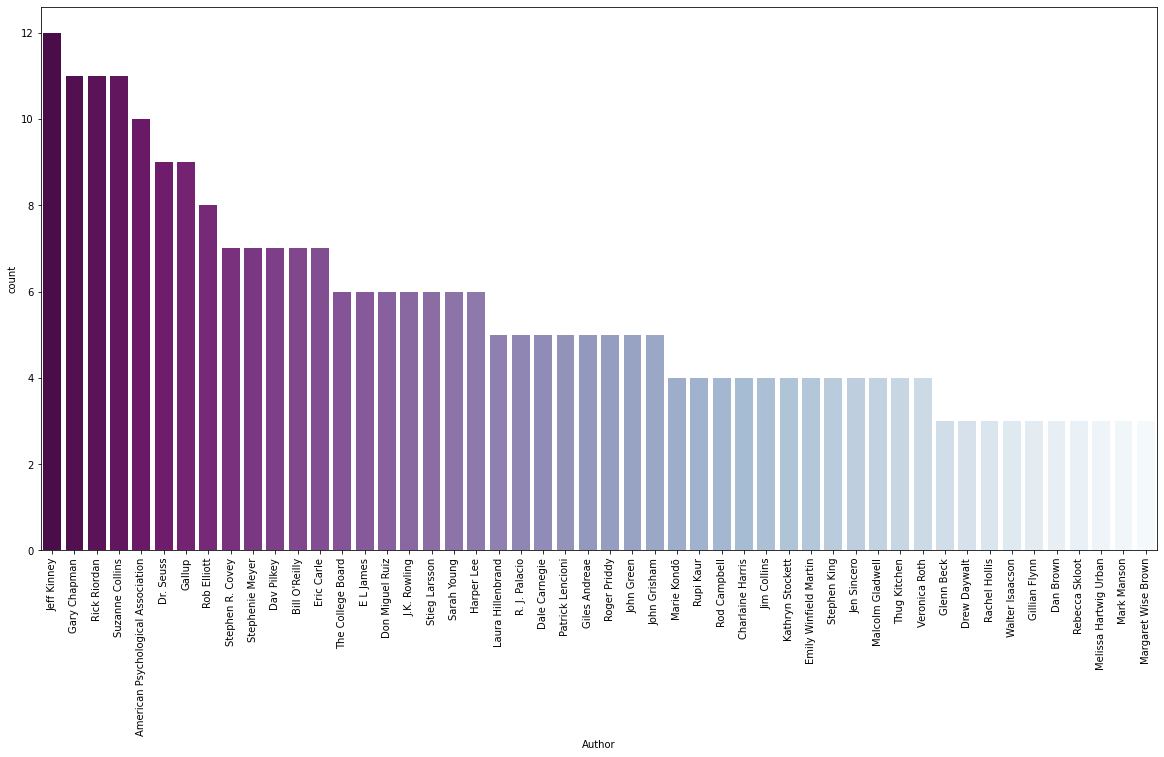

In [53]:
plt.figure(figsize=(20 ,10 ))
plt.xticks(rotation=90)
sns.countplot(data = df , x =df['Author'] ,palette='BuPu_r',order=df['Author'].value_counts().index[0:50])
plt.show()

**Which are the top rated books?**

In [54]:
f1=df[df['User_Rating']==4.9]

In [55]:

f1['Author'].value_counts().reset_index()

,index,Author
0,Dr. Seuss,8
1,Eric Carle,7
2,Dav Pilkey,7
3,Sarah Young,6
4,Emily Winfield Martin,4
5,J.K. Rowling,3
6,Bill Martin Jr.,2
7,Sherri Duskey Rinker,2
8,Rush Limbaugh,2
9,Nathan W. Pyle,1


* **Dr. Seuss have maximum no of books which have 4.9 ratings**

In [56]:
a1=df.sort_values(by="User_Rating",ascending=False) #viewCount goes from highest to lowest.
a1

,Name,Author,User_Rating,Reviews,Price,Year,Genre
431,The Magnolia Story,Chip Gaines,4.9,7861,5,2016,Non Fiction
87,Dog Man: Lord of the Fleas: From the Creator o...,Dav Pilkey,4.9,5470,6,2018,Fiction
85,Dog Man: Fetch-22: From the Creator of Captain...,Dav Pilkey,4.9,12619,8,2019,Fiction
84,Dog Man: Brawl of the Wild: From the Creator o...,Dav Pilkey,4.9,7235,4,2019,Fiction
83,Dog Man: Brawl of the Wild: From the Creator o...,Dav Pilkey,4.9,7235,4,2018,Fiction
...,...,...,...,...,...,...,...
22,Allegiant,Veronica Roth,3.9,6310,13,2013,Fiction
107,Fifty Shades of Grey: Book One of the Fifty Sh...,E L James,3.8,47265,14,2013,Fiction
106,Fifty Shades of Grey: Book One of the Fifty Sh...,E L James,3.8,47265,14,2012,Fiction
132,Go Set a Watchman: A Novel,Harper Lee,3.6,14982,19,2015,Fiction


In [57]:
a1.Name.value_counts()

Publication Manual of the American Psychological Association, 6th Edition       10
StrengthsFinder 2.0                                                              9
Oh, the Places You'll Go!                                                        8
The 7 Habits of Highly Effective People: Powerful Lessons in Personal Change     7
The Very Hungry Caterpillar                                                      7
                                                                                ..
What Pet Should I Get? (Classic Seuss)                                           1
What If?: Serious Scientific Answers to Absurd Hypothetical Questions            1
Uninvited: Living Loved When You Feel Less Than, Left Out, and Lonely            1
Twilight (The Twilight Saga, Book 1)                                             1
The Casual Vacancy                                                               1
Name: Name, Length: 351, dtype: int64

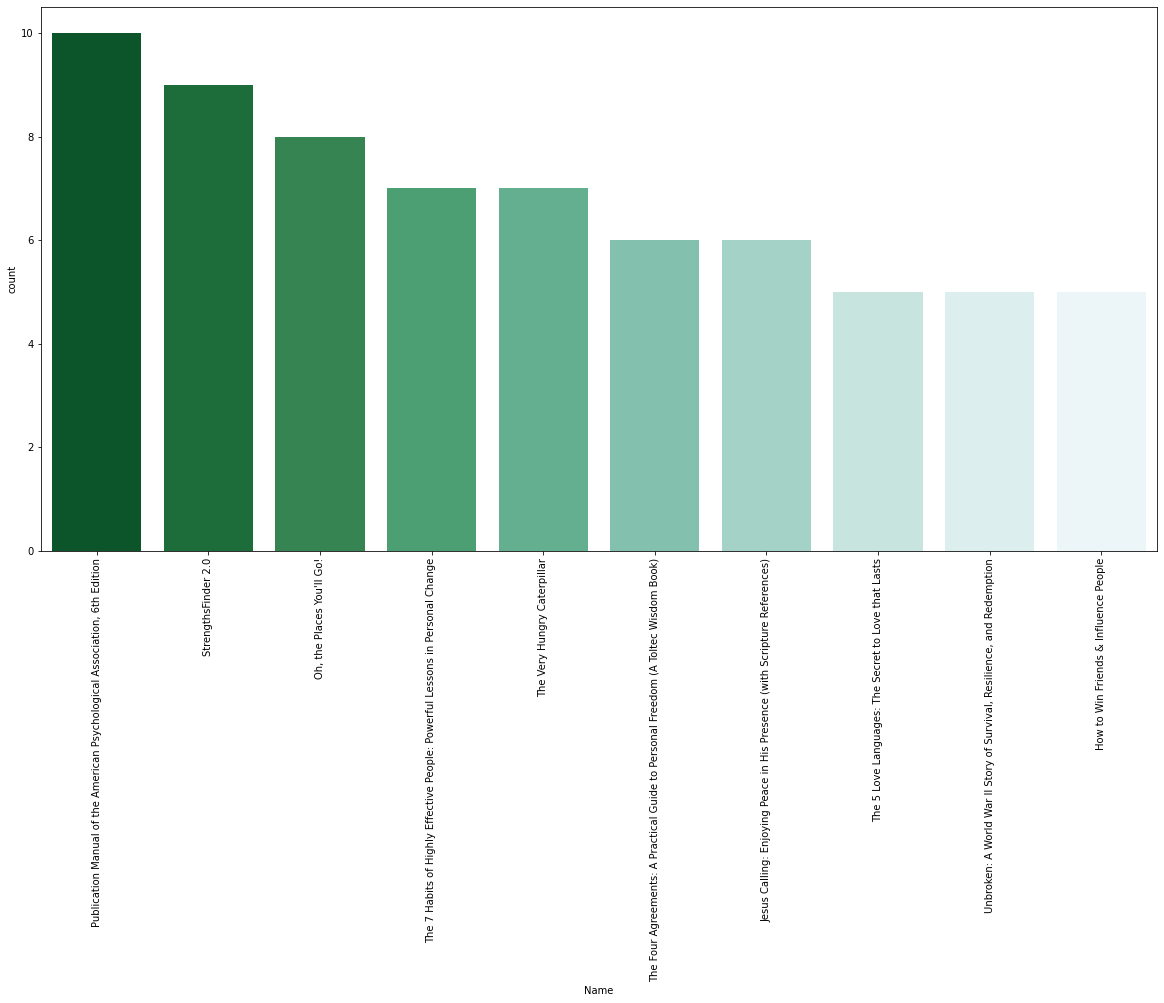

In [60]:
plt.figure(figsize=(20 ,10 ))
plt.xticks(rotation=90)
sns.countplot(data = a1 , x =a1['Name'] ,palette='BuGn_r',order=a1['Name'].value_counts().index[0:10])
plt.show()

**What are the most visited books?**

In [61]:
df.sort_values(by='Reviews',ascending=False)[0:550]

,Name,Author,User_Rating,Reviews,Price,Year,Genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction
382,The Girl on the Train,Paula Hawkins,4.1,79446,18,2015,Fiction
383,The Girl on the Train,Paula Hawkins,4.1,79446,7,2016,Fiction
32,Becoming,Michelle Obama,4.8,61133,11,2018,Non Fiction
33,Becoming,Michelle Obama,4.8,61133,11,2019,Non Fiction
...,...,...,...,...,...,...,...
359,The Daily Show with Jon Stewart Presents Earth...,Jon Stewart,4.4,440,11,2010,Non Fiction
512,True Compass: A Memoir,Edward M. Kennedy,4.5,438,15,2009,Non Fiction
121,George Washington's Sacred Fire,Peter A. Lillback,4.5,408,20,2010,Non Fiction
300,Soul Healing Miracles: Ancient and New Sacred ...,Zhi Gang Sha,4.6,220,17,2013,Non Fiction


In [62]:

oldest_us_series=df.sort_values(by='Reviews',ascending=False)[0:550]

fig = go.Figure(data=[go.Table(header=dict(values=['Name', 'Reviews'],fill_color='green'),
                 cells=dict(values=[oldest_us_series['Name'],oldest_us_series['Reviews']],fill_color='white'))
                     ])
fig.show()
               

**Movie Genre in Each Year**

In [63]:
genre_by_year = df.groupby('Year')['Genre'].value_counts().reset_index(level=0).rename(columns={'Genre': 'Genre count'}, index={'index': 'Genre'})
genre_by_year

,Year,Genre count
Genre,,
Non Fiction,2009,26
Fiction,2009,24
Non Fiction,2010,30
Fiction,2010,20
Non Fiction,2011,29
Fiction,2011,21
Non Fiction,2012,29
Fiction,2012,21
Non Fiction,2013,26


In [64]:

fig = px.line(genre_by_year, x='Year', y='Genre count', color= genre_by_year.index, title='Movies By Genre in Each Year')
fig.show()

**The number of non-fiction books decreased significantly in 2014 but then sharply increased in 2015. In contrast, the number of fiction books significantly increased in 2014 but then sharply decreased in 2015. Both fiction and non-fiction books have inconsistent counts from year to year, meaning that the number of books published each year varies and does not follow a consistent pattern.**

**Price of Books in Each Year**

In [65]:
fig = px.scatter(df, x='Year', y='Price', title='Price of the Books in Each Year' ,hover_data = df[['Name','Author']])
fig.show()

**Most of the books have similar prices each year, but there are a few books that are priced higher or lower than the average. Specifically, there are some books from the American Psychiatric Association in 2013 and 2014 that are priced at $105, which is higher than the average price for most books.**

**Ratings given by user and reviews of books**


<AxesSubplot:xlabel='User_Rating', ylabel='Reviews'>

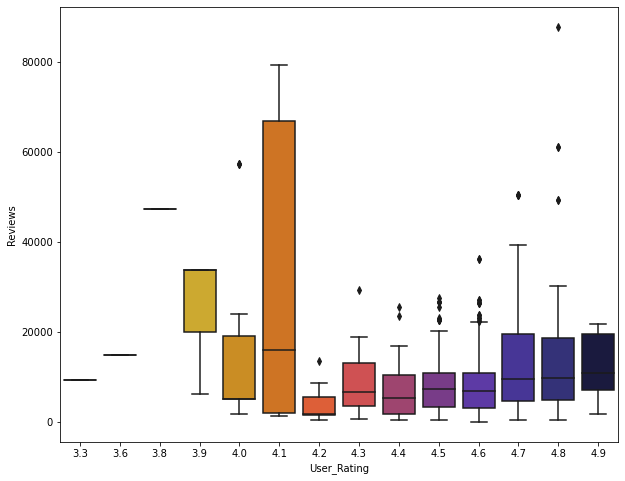

In [66]:
plt.figure(figsize=(10,8))
sns.boxplot(x=df['User_Rating'],y=df['Reviews'],palette='CMRmap_r')

**Grouping the data by year**

In [67]:

f2 =df.groupby('Year').mean()

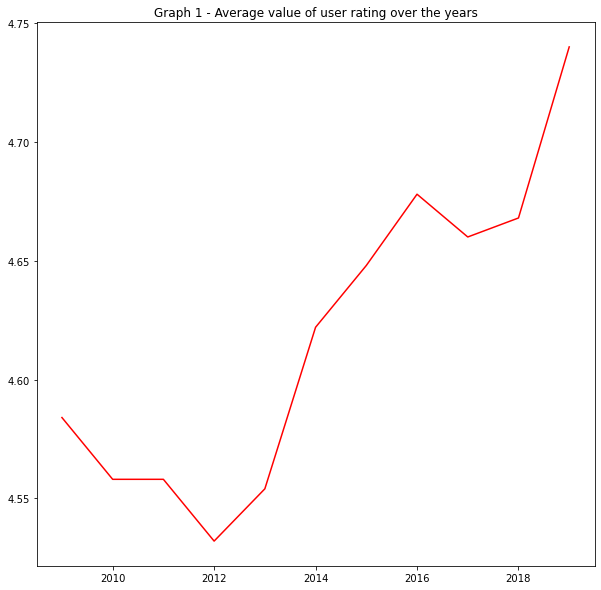

In [68]:
plt.plot(f2.index,f2['User_Rating'],color='red')
plt.title('Graph 1 - Average value of user rating over the years')
plt.show()

**As you can see in the graph above, the user rating has increased significantly over the years**

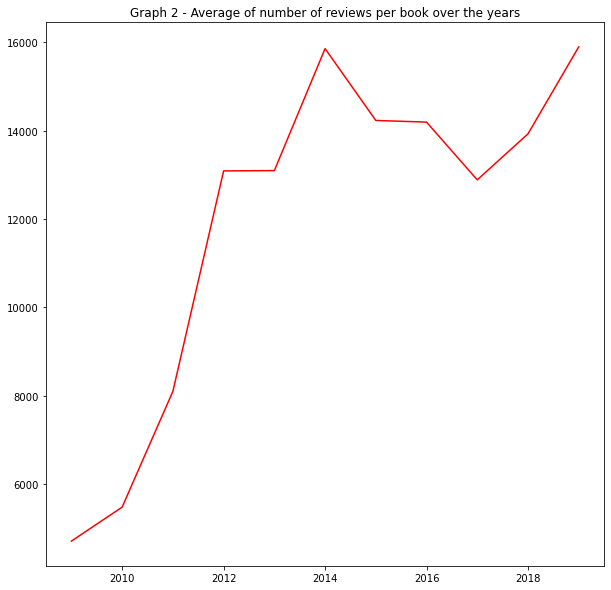

In [69]:
plt.plot(f2.index,f2['Reviews'],color='red')
plt.title('Graph 2 - Average of number of reviews per book over the years')

plt.show()




**The graph above shows that, after 2012, the average reviews per book has not changed much. Nevertheless, the user rating has changend drastically.**

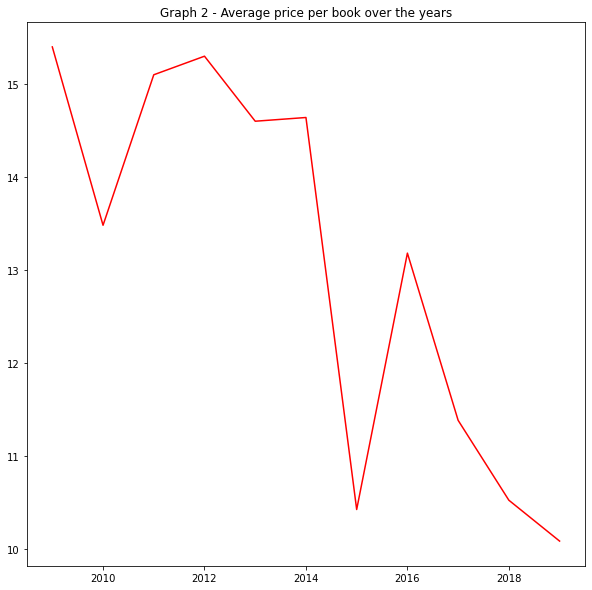

In [70]:
plt.plot(f2.index,f2['Price'],color='red')
plt.title('Graph 2 - Average price per book over the years')
plt.show()

**As you can see in the graph, the average price of the top sold books has decreased in a signicant way.**

In [71]:
grow = ((f2['Reviews'].loc[2012]/f2['Reviews'].loc[2010])-1)*100
round(grow,2)
print(str(grow) + '%')

138.9019676546914%


**the average number of reviews per book has increased more than 138% in two years.**

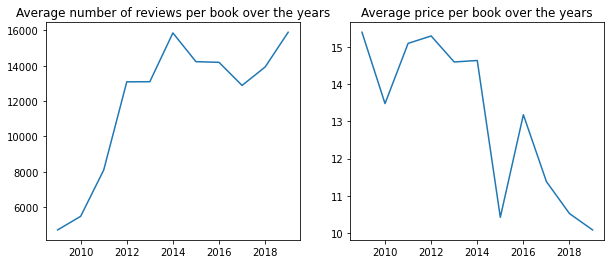

In [72]:
figure, axes = plt.subplots(1, 2, figsize=(10,4))
axes[0].plot(f2.index,f2['Reviews'])
axes[0].set_title('Average number of reviews per book over the years')

axes[1].plot(f2.index,f2['Price'])
axes[1].set_title('Average price per book over the years');

**As you can see in the comparison above, the number of reviews and the price of the books is correlated to  each other**


# **Step 5 : Conclusion**
* In this notebook, we observed the data about top 50 bestselling books on Amazon.
* No clear correlation between user rating and other features was observed, but we could find some weak correlations.


# **I hope you liked this article on the Data Science project on Amazon Bestselling books analysis with Python programming language.**
# 
# **Upvote if you like**

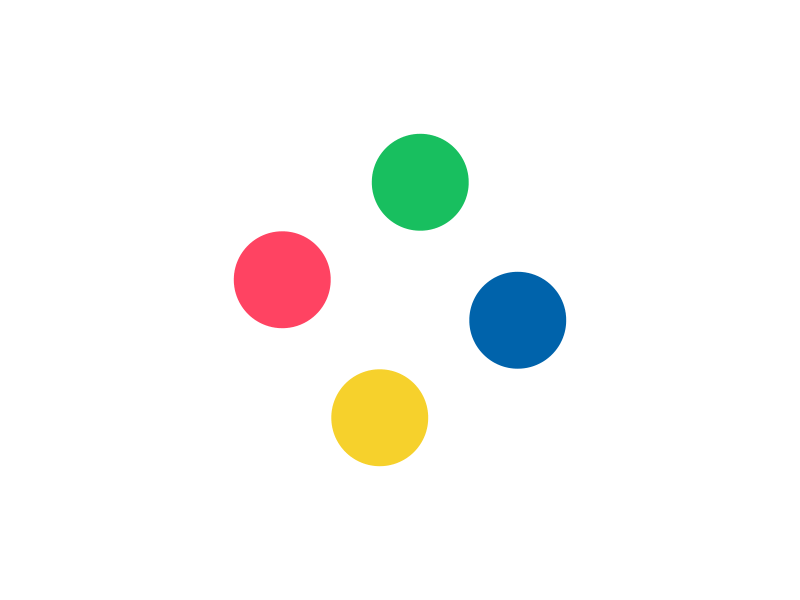